# Examen Interciclo

Estudiante : Fabricio Gomez Avila.

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
import numpy as np
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import plotly 
from plotly.graph_objs import Scatter, Layout
from scipy.optimize import curve_fit

In [7]:

#Metodo para contar las palabras del post obtenido
def contador(post):
    cont=0
    for char in post:        
            cont+=1
    return cont
#En este arreglo se guardan las publicaciones que tenemos
posteosYaku = []
for post in get_posts('yakuperezoficial', pages=4):
        post['Word count'] = len(post['text'])
        posteosYaku.append(post)          
posteosYaku = pd.DataFrame(posteosYaku)
posteosYaku.describe()

,likes,comments,shares,Word count
count,14.000000,14.000000,14.000000,14.000000
mean,1683.428571,642.571429,439.428571,335.642857
std,651.473798,735.792583,577.308039,171.819497
min,321.000000,29.000000,0.000000,181.000000
25%,1317.000000,78.500000,0.000000,235.000000
50%,1642.000000,173.500000,0.000000,247.000000
75%,2107.500000,1198.000000,788.750000,361.000000
max,2759.000000,2138.000000,1447.000000,734.000000


In [8]:
#Las publicaciones de papi yaku
posteosYaku = []
for post in get_posts('yakuperezoficial', pages=4):
        post['Word count'] = len(post['text'])
        posteosYaku.append(post)          
posteosYaku = pd.DataFrame(posteosYaku)

posteosNoboa = []
for post in get_posts('AlvaroNoboaPonton', pages=4):
        post['Word count'] = len(post['text'])
        posteosNoboa.append(post)          
posteosNoboa = pd.DataFrame(posteosNoboa)
fb_posts1 = pd.DataFrame(posteosNoboa)
fb_posts2 = pd.DataFrame(posteosYaku)

In [9]:
fb_posts1.describe()
fb_posts2.describe()

,likes,comments,shares,Word count
count,14.000000,14.000000,14.000000,14.000000
mean,1683.428571,642.571429,439.428571,335.642857
std,651.473798,735.792583,577.308039,171.819497
min,321.000000,29.000000,0.000000,181.000000
25%,1317.000000,78.500000,0.000000,235.000000
50%,1642.000000,173.500000,0.000000,247.000000
75%,2107.500000,1198.000000,788.750000,361.000000
max,2759.000000,2138.000000,1447.000000,734.000000


In [11]:
fb_posts1.head()
fb_posts2.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,Word count
0,3326581630814907,Mi gratitud infinita a esta ciudad de herencia...,Mi gratitud infinita a esta ciudad de herencia...,WWW.YAKUPEREZ.COM\nYaku Pérez Guartambel - Def...,2020-12-22 13:21:44,None,https://scontent.fcue1-1.fna.fbcdn.net/v/t42.9...,https://scontent.fcue1-1.fna.fbcdn.net/v/t15.5...,418287135965373,932,78,0,https://facebook.com/watch?v=418287135965373,http://www.yakuperez.com/,2069422096530873,[],734
1,3327385017401235,Tengan la seguridad que en mi gobierno estarán...,Tengan la seguridad que en mi gobierno estarán...,,2020-12-23 13:33:31,None,https://video.fcue1-1.fna.fbcdn.net/v/t42.9040...,https://scontent.fcue1-1.fna.fbcdn.net/v/t15.5...,2733714076868275,321,29,0,https://facebook.com/watch?v=2733714076868275,None,2069422096530873,[],698
2,413421313426436,⭕️ EN VIVO | En la #PerladelPacifico #Guayaqui...,⭕️ EN VIVO | En la #PerladelPacifico #Guayaqui...,,2020-12-22 11:12:12,None,https://scontent.fcue1-1.fna.fbcdn.net/v/t66.3...,https://scontent.fcue1-1.fna.fbcdn.net/v/t15.1...,413421313426436,1410,901,811,https://facebook.com/watch?v=413421313426436,http://www.yakuperez.com/,2069422096530873,[],238
3,3325347017605035,Siempre estaremos agradecidos a esta ciudad de...,Siempre estaremos agradecidos a esta ciudad de...,,2020-12-20 21:28:53,https://scontent.fcue1-1.fna.fbcdn.net/v/t1.0-...,None,None,None,2049,123,0,https://facebook.com/story.php?story_fbid=3325...,None,2069422096530873,[https://scontent.fcue1-1.fna.fbcdn.net/v/t1.0...,362
4,385648012502573,⭕️ EN VIVO | En Minka recorriendo las calles d...,⭕️ EN VIVO | En Minka recorriendo las calles d...,,2020-12-20 19:17:35,None,https://scontent.fcue1-1.fna.fbcdn.net/v/t66.3...,https://scontent.fcue1-1.fna.fbcdn.net/v/t15.1...,385648012502573,2127,1569,1379,https://facebook.com/watch?v=385648012502573,http://www.yakuperez.com/,2069422096530873,[],243


In [12]:
likesYaku = posteosYaku['likes']
likesNoboa = posteosNoboa['likes']
#genera un grafico en html
plotly.offline.plot({
    "data": [Scatter(x = likesYaku, y=likesNoboa)],
})

'temp-plot.html'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CB0096D60>,
      dtype=object)

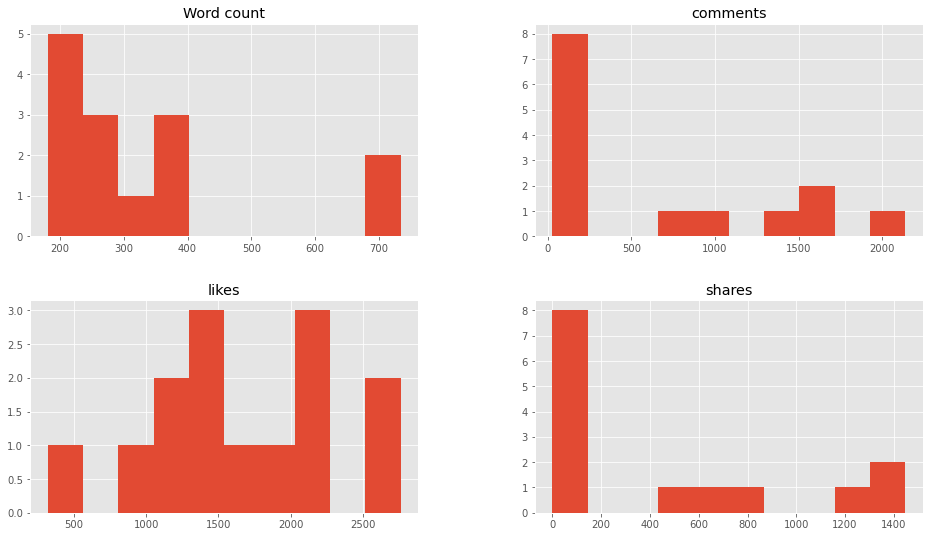

In [13]:
posteosYaku.drop(['post_id','post_url', 'time'],1).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CB0EAD6D0>,
      dtype=object)

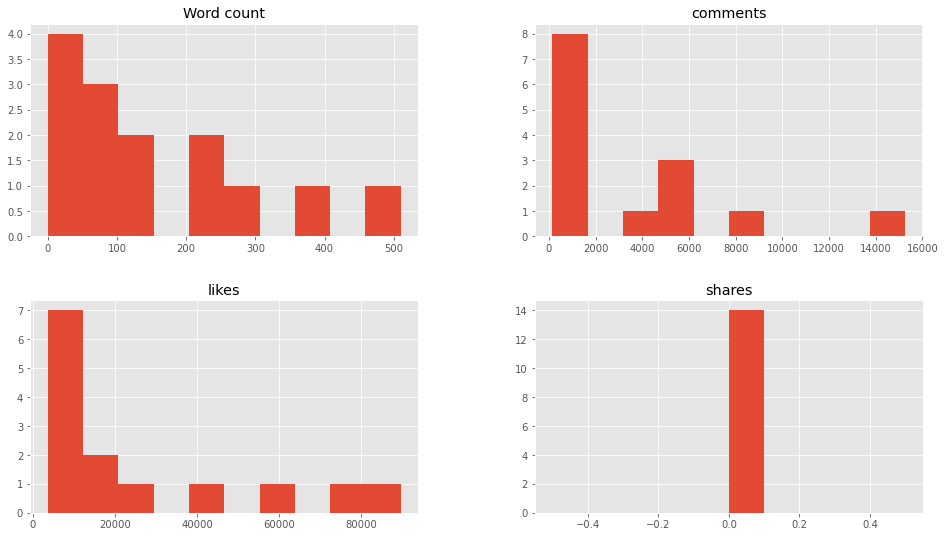

In [14]:
posteosNoboa.drop(['post_id','post_url', 'time'],1).hist()

In [15]:
#Regresion con los datos del candidato Yaku Perez.
y = np.array(likesYaku)
x = np.array(range(0, len(y)))
regresionYaku = linear_model.LinearRegression()
regresionYaku.fit(x.reshape(-1, 1), y)
prediccion = regresionYaku.predict(x.reshape(-1, 1))
#coeficiente de regresion
regresionYaku.coef_

array([53.31868132])

In [16]:
mean_squared_error(x.reshape(-1, 1), y)

3204475.3571428573

In [17]:
#Regresion con los datos del candidato Alvarito Noboa.
yn = np.array(likesNoboa)
xn = np.array(range(0, len(yn)))
regresionNoboa = linear_model.LinearRegression()
regresionNoboa.fit(xn.reshape(-1, 1), yn)
prediccion = regresionNoboa.predict(xn.reshape(-1, 1))
#coeficiente de regresion
regresionNoboa.coef_

array([1596.04395604])

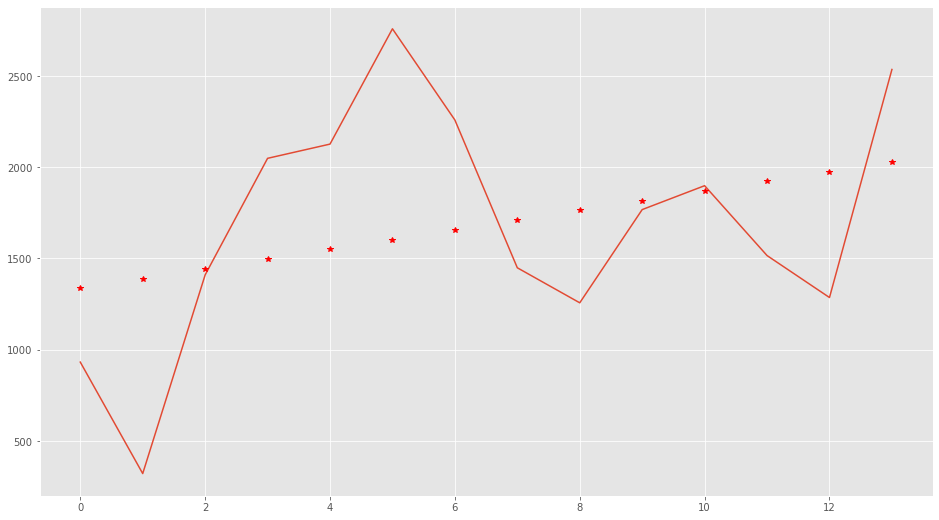

In [21]:
#creamos una funcion de regresion exponencial, para los datos de Yaku Perez.
def reg_exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

g = [100, 0.001, 10, 0.001]
pre = np.empty(len(y))
for i in range(len(y)):
    pre[i] = reg_exponencial(x[i], g[0], g[1], g[2], g[3])
    
popt, pcov = curve_fit(reg_exponencial, x, y, g)
for i in range(len(y)):
    pre[i] = reg_exponencial(x[i], popt[0], popt[1], popt[2], popt[3])
plt.plot(x, y)
plt.plot(x, pre, 'r*')

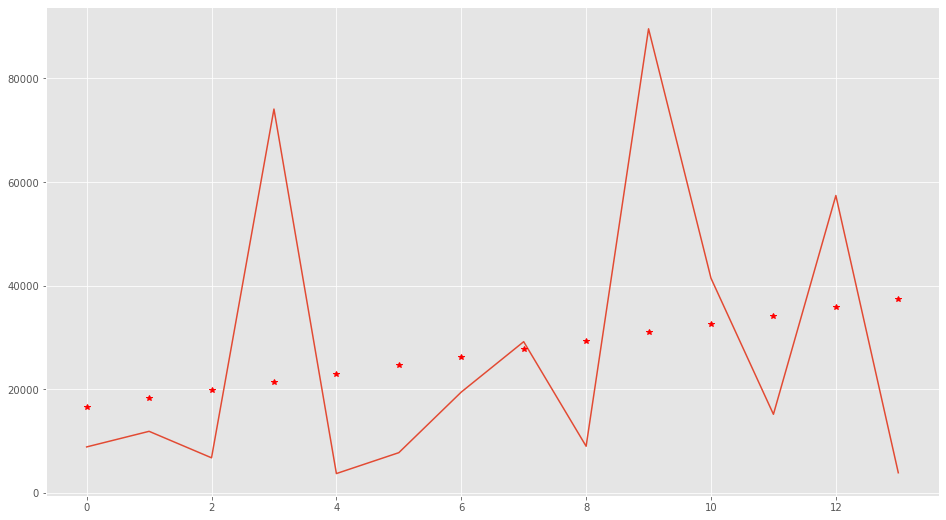

In [22]:
def reg_exponencial(xn, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * xn) + c2 + c3

g = [100, 0.001, 10, 0.001]
pre = np.empty(len(y))
for i in range(len(y)):
    pre[i] = reg_exponencial(xn[i], g[0], g[1], g[2], g[3])
    
popt, pcov = curve_fit(reg_exponencial, xn, yn, g)
for i in range(len(yn)):
    pre[i] = reg_exponencial(xn[i], popt[0], popt[1], popt[2], popt[3])
plt.plot(xn, yn)
plt.plot(xn, pre, 'r*')

# Conclusion:

Las regresiones son muy usadas pues la  idea clave 
detrás del análisis de regresión es la dependencia estadística de una variable, 
la variable dependiente, sobre una o más variables, las variables explicativas, por lo que nos ayuda a pronosticar datos y en base a esos datos tomar desiciones para el bienestar del proyecto.